In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [2]:
df["ever_married"].replace(["Yes","No"],[1,0], inplace=True)

In [3]:
df.drop(columns="id",inplace=True)
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [4]:
count=0
for i in df.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)
print('since it is only',round((count/len(df.index))*100), 'percent of the entire dataset the rows with missing values are excluded.')

Total number of rows with missing values is  201
since it is only 4 percent of the entire dataset the rows with missing values are excluded.


In [5]:
df.dropna(axis=0,inplace=True)

# Exploratory Analysis

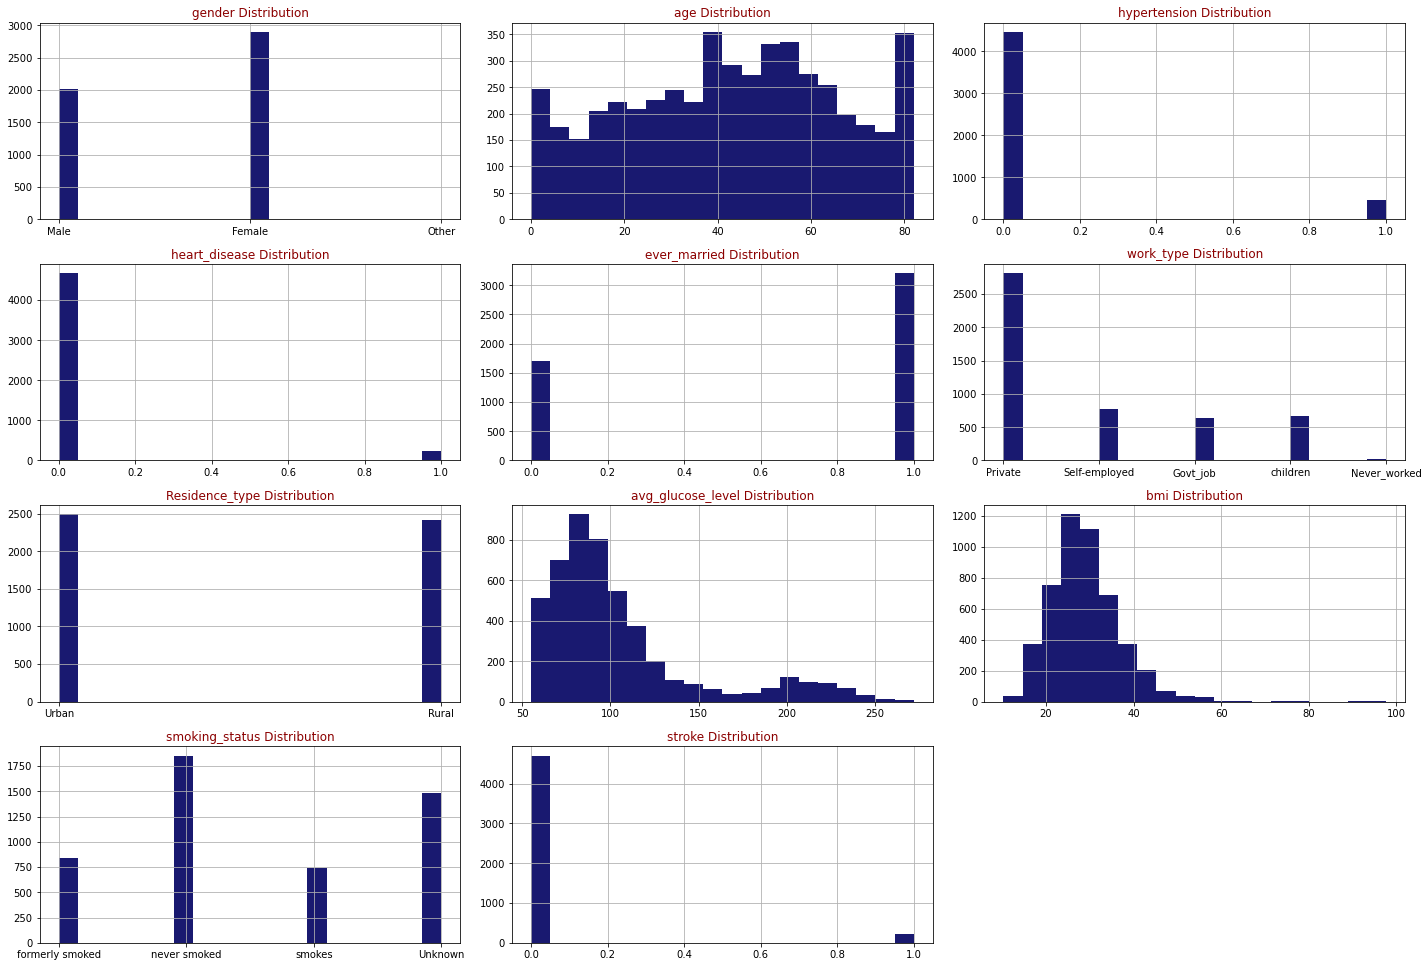

In [6]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(df,df.columns,6,3)

In [7]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,1,Private,Urban,186.21,29.0,formerly smoked,1


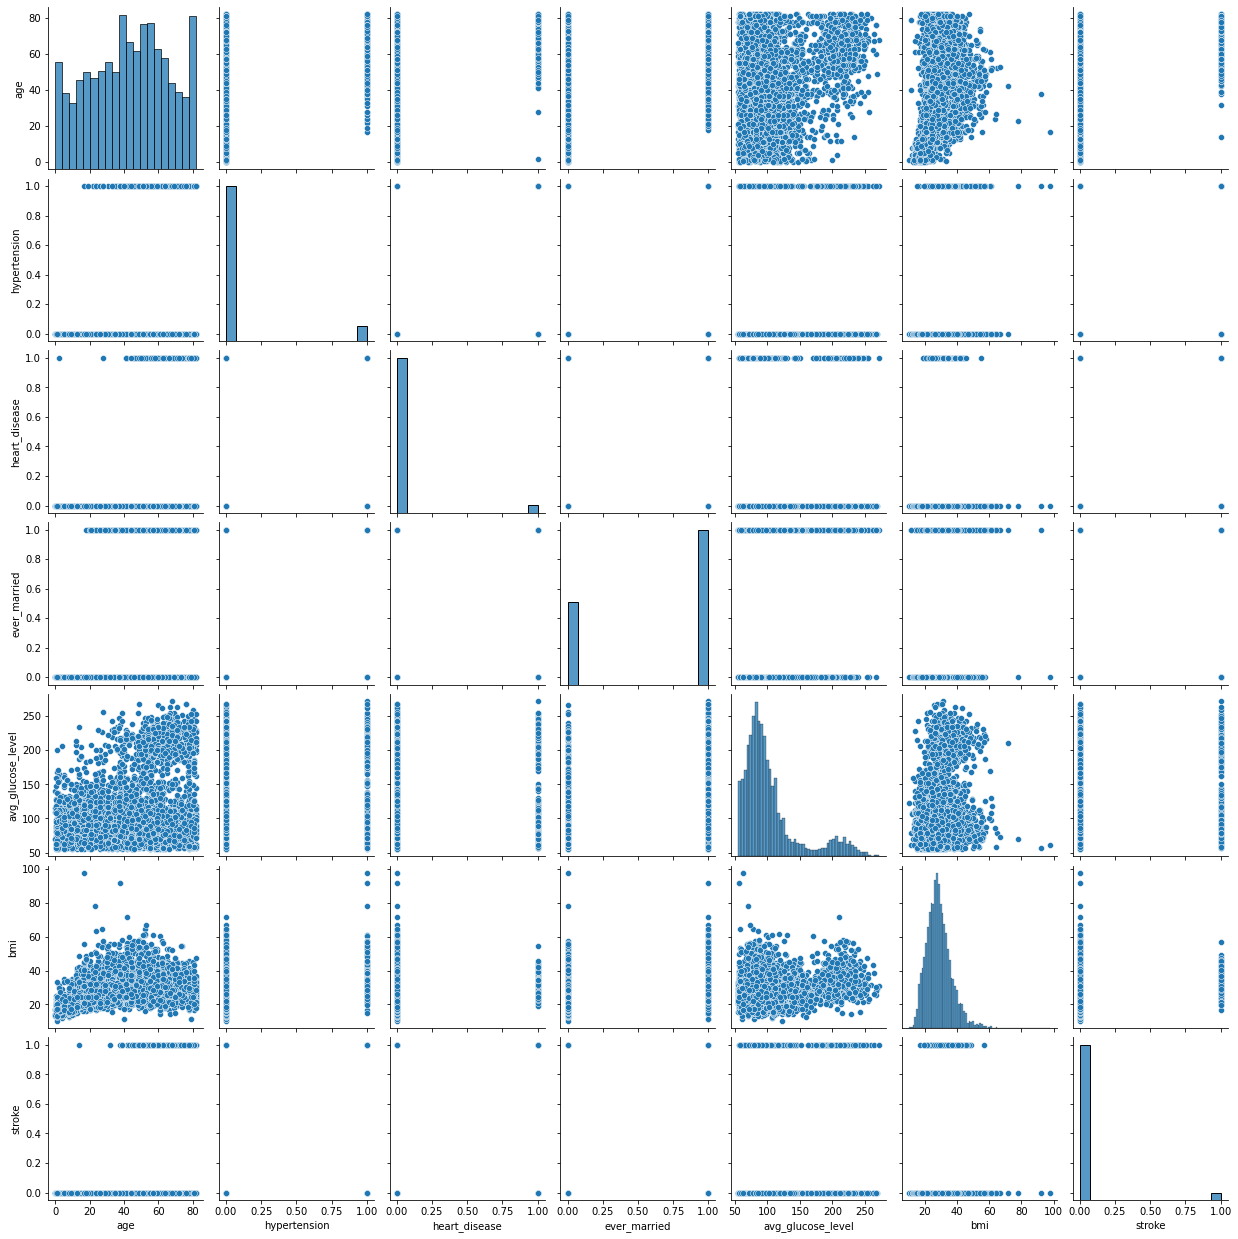

In [8]:
sns.pairplot(data=df)

In [9]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [11]:
lst1 = ['gender','work_type', 'Residence_type', 'smoking_status']
lst2 = ['age', 'hypertension', 'heart_disease', 'ever_married','avg_glucose_level', 'bmi', 'stroke']
dfn = df[lst1]
def dumy_df(dataframe):
    lst = dataframe.columns
    col = len(dataframe.columns)
    
    for i in range(col):
        
        df_wt = pd.get_dummies(dataframe[lst[i]])
        dataframe = pd.concat([dataframe, df_wt],axis=1)
        dataframe.drop(columns=lst[i] ,inplace=True)
        
    return dataframe

df = pd.concat([dumy_df(dfn),df[lst2]], axis=1)

In [12]:
df.head()

,Female,Male,Other,Govt_job,Never_worked,Private,Self-employed,children,Rural,Urban,...,formerly smoked,never smoked,smokes,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke
0,0,1,0,0,0,1,0,0,0,1,...,1,0,0,67.0,0,1,1,228.69,36.6,1
2,0,1,0,0,0,1,0,0,1,0,...,0,1,0,80.0,0,1,1,105.92,32.5,1
3,1,0,0,0,0,1,0,0,0,1,...,0,0,1,49.0,0,0,1,171.23,34.4,1
4,1,0,0,0,0,0,1,0,1,0,...,0,1,0,79.0,1,0,1,174.12,24.0,1
5,0,1,0,0,0,1,0,0,0,1,...,1,0,0,81.0,0,0,1,186.21,29.0,1


In [13]:
x = pd.DataFrame(df.iloc[:,:-1])
y = pd.DataFrame(df.iloc[:,-1])

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30)

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score

In [15]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
clf = GaussianNB()

# Train the model using the training sets
clf.fit(x_train, y_train.values.ravel())

#Predict Output
y_pred= clf.predict(x_test)

# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')

Accuracy Score: 0.4378818737270876
Confusion Matrix: 
[[399 548]
 [  4  31]]
Area Under Curve: 0.6535224015688641
Recall score: 0.8857142857142857


In [16]:
from sklearn.tree import DecisionTreeClassifier
#define model
clf = DecisionTreeClassifier(random_state=13)
# fit it
clf.fit(x_train, y_train.values.ravel())
# test
y_pred = clf.predict(x_test)
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')

Accuracy Score: 0.9093686354378818
Confusion Matrix: 
[[889  58]
 [ 31   4]]
Area Under Curve: 0.5265198370794992
Recall score: 0.11428571428571428


In [17]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
#Import Gaussian Naive Bayes model
from sklearn.svm import SVC

#Create a Gaussian Classifier
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))

# Train the model using the training sets
clf.fit(x_train, y_train.values.ravel())

#Predict Output
y_pred= clf.predict(x_test)

# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')

Accuracy Score: 0.9643584521384929
Confusion Matrix: 
[[947   0]
 [ 35   0]]
Area Under Curve: 0.5
Recall score: 0.0


In [18]:
#define model
from sklearn.linear_model import LogisticRegression
lgl = LogisticRegression(solver='liblinear')

# fit it
lgl.fit(x_train, y_train.values.ravel())

# test
y_pred = lgl.predict(x_test)

# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'Precision score: {precision_score(y_test,y_pred)}')

Accuracy Score: 0.9633401221995926
Confusion Matrix: 
[[946   1]
 [ 35   0]]
Area Under Curve: 0.49947201689545934
Recall score: 0.0
Precision score: 0.0


In [19]:
# define class weights
w = {0:1, 1:99}
# define model
lg2 = LogisticRegression(solver='liblinear',random_state=13, class_weight=w)
# fit it
lg2.fit(x_train, y_train.values.ravel())
# test
y_pred = lg2.predict(x_test)
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')

Accuracy Score: 0.5407331975560081
Confusion Matrix: 
[[500 447]
 [  4  31]]
Area Under Curve: 0.7068486951274702
Recall score: 0.8857142857142857


In [20]:
#Import Gaussian Naive Bayes model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf = RandomForestClassifier()

# Train the model using the training sets
clf.fit(x_train, y_train.values.ravel())

#Predict Output
y_pred= clf.predict(x_test)

# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')

Accuracy Score: 0.9623217922606925
Confusion Matrix: 
[[945   2]
 [ 35   0]]
Area Under Curve: 0.4989440337909187
Recall score: 0.0
